In [1]:
import numpy as np
import scipy
import random
import urllib
import matplotlib.pyplot as plt
import json
import gmplot

In [2]:
random.seed(0) #set an initial seed so that we can reproduce consistently

In [3]:
def readJSONfromFile(fname):
    yelp_data = []
    with open(fname) as f:
        for line in f:
            yelp_data.append(json.loads(line))
    return yelp_data

In [4]:
data = readJSONfromFile('data/yelp_academic_dataset_business.json')

In [5]:
print("The dataset has {} businesses".format(len(data)))

The dataset has 144072 businesses


In [6]:
data[11]

{u'address': u'1500 N Green Valley Pkwy, Ste 230',
 u'attributes': [u'Alcohol: none',
  u"Ambience: {'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}",
  u'BusinessAcceptsCreditCards: True',
  u"BusinessParking: {'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
  u'Caters: True',
  u'GoodForKids: True',
  u"GoodForMeal: {'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'breakfast': False, 'brunch': False}",
  u'HasTV: True',
  u'NoiseLevel: quiet',
  u'OutdoorSeating: False',
  u'RestaurantsAttire: casual',
  u'RestaurantsDelivery: False',
  u'RestaurantsGoodForGroups: True',
  u'RestaurantsPriceRange2: 1',
  u'RestaurantsReservations: False',
  u'RestaurantsTableService: False',
  u'RestaurantsTakeOut: True',
  u'WiFi: no'],
 u'business_id': u'42romV8altAeuZuP2OC1gw',
 u'categories': [u'Hawaiian', u'Restaurants', u'Barbeq

In [11]:
restaurant_data = []
restaurant_id_set = set()   #set of ids of business = restaurant useful for processing of other json files
for business in data:
    if business["categories"]!= None and "Restaurants" in business["categories"]:
        restaurant_data.append(business)
        restaurant_id_set.add(business["business_id"])
        

In [12]:
print("The number of businesses which are just restaurants is {}".format(len(restaurant_data)))

The number of businesses which are just restaurants is 48485


In [13]:
yelp_user_review_data = []
with open("data/yelp_academic_dataset_review.json", "U") as f:
    for line in f:
        review = json.loads(line)
        if review["business_id"] in restaurant_id_set:
            yelp_user_review_data.append(review)

In [14]:
print("Number of user reviews pertaining to restaurants is {}".format(len(yelp_user_review_data)))

Number of user reviews pertaining to restaurants is 2577298


In [15]:
f.close()

In [16]:
yelp_user_review_data[0]

{u'business_id': u'4P-vTvE6cncJyUyLh73pxw',
 u'cool': 0,
 u'date': u'2014-03-29',
 u'funny': 0,
 u'review_id': u'6-hKBi-6RC3g7Mft0c-6qw',
 u'stars': 4,
 u'text': u'This place is a area staple! Been around for years and not much has changed - I see this as a good thing! Stable and reliable!\n\nMy family goes every year for St. Pattys Day corn beef! Very nice place for a bar night dinner, or to catch up with some friends over drinks!',
 u'type': u'review',
 u'useful': 0,
 u'user_id': u'PmgqNO0-5Y3e3UoR61TD7w'}

In [17]:
I_u = {}
U_i = {}

In [18]:
cutoff= 400000

In [19]:
for datum in yelp_user_review_data:
    if I_u.has_key(datum['business_id']):
        I_u[datum['business_id']].append(datum['stars'])
    else:
        I_u[datum['business_id']] = [datum['stars']]
    if U_i.has_key(datum['user_id']):
        U_i[datum['user_id']].append(datum['stars'])
    else:
        U_i[datum['user_id']] = [datum['stars']]
    

In [20]:
len(I_u['4P-vTvE6cncJyUyLh73pxw'])

23

In [21]:
thresh = 10

In [22]:
len_u = []
len_i = []
for k in I_u.keys():
    if len(I_u[k]) > thresh:
        len_i.append(len(I_u[k]))
for k in U_i.keys():
    if len(U_i[k]) > thresh:
        len_u.append(len(U_i[k]))
    

In [23]:
avg_u = []
avg_i = []
for k in I_u.keys():
    if len(I_u[k]) > thresh:
        avg_i.append(np.mean(I_u[k]))
for k in U_i.keys():
    if len(U_i[k]) > thresh:
        avg_u.append(np.mean(U_i[k]))
    

In [24]:
len_u = []
len_i = []
for k in I_u.keys():
    len_i.append(len(I_u[k]))
for k in U_i.keys():
    len_u.append(len(U_i[k]))
    

In [25]:
len_u.sort()
len_u = len_u[:int(len(len_u)*0.99)]

In [26]:
len_i.sort()
len_i = len_i[:int(len(len_i)*0.99)]

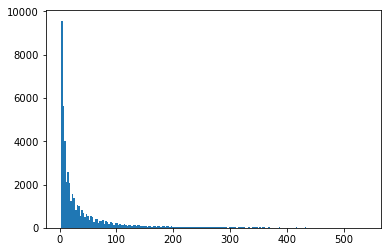

In [27]:
plt.hist(len_i,bins=200)
plt.show()

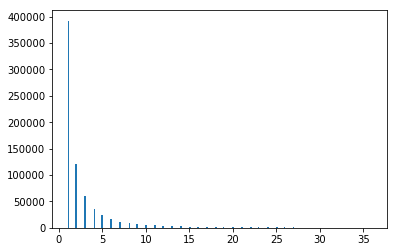

In [28]:
plt.hist(len_u,bins=200)
plt.show()

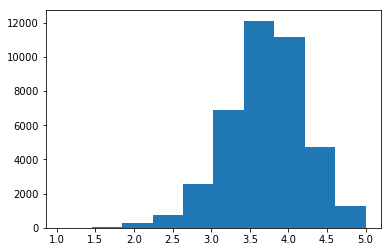

In [29]:
plt.hist(avg_u)
plt.show()

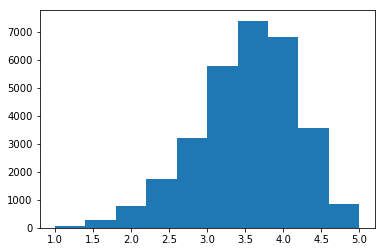

In [30]:
plt.hist(avg_i)
plt.show()

In [31]:
latitudes = [[],[],[],[]]
longitudes = [[],[],[],[]]
for datum in restaurant_data:
    if datum['stars'] == 5:
        latitudes[-1].append(datum['latitude'])
        longitudes[-1].append(datum['longitude']) 
    else:
        latitudes[int(datum['stars'])-1].append(datum['latitude'])
        longitudes[int(datum['stars'])-1].append(datum['longitude'])

In [33]:
#latitudes[0]

In [34]:
gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)

# gmap.plot(latitudes, longitudes, 'cornflowerblue', edge_width=10)
# gmap.scatter(more_lats, more_lngs, '#3B0B39', size=40, marker=False)
# gmap.scatter(marker_lats, marker_lngs, 'k', marker=True)
# gmap.heatmap(latitudes, longitudes)

gmap.scatter(latitudes[0], longitudes[0],'#c41d00', size=40, marker=False)
gmap.scatter(latitudes[1], longitudes[1],'#fc9a10', size=40, marker=False)
gmap.scatter(latitudes[2], longitudes[2],'#fcf811', size=40, marker=False)
gmap.scatter(latitudes[3], longitudes[3],'#008712', size=40, marker=False)
# gmap.scatter(latitudes[4], longitudes[4],'#11ff31', size=40, marker=False)

gmap.draw("mymap.html")